<a href="https://colab.research.google.com/github/Davjot/ML-Projects-Using-Python/blob/main/Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Detection

**OpenCV** is a huge open-source library for computer vision, machine learning, and image processing.

**cvlib** : A simple, high level, easy-to-use open source Computer Vision library for Python.

# Installing Libraries 

In [33]:
!pip install opencv-python &> /dev/null
!pip install cvlib &> /dev/null

# Importing Libraries

In [43]:
import cv2
import cvlib as cv
import sys
import numpy as np
from numpy.lib.type_check import imag
image = cv2.imread('/content/male.jpg')

# Logic for Gender Detection 

In [44]:
from google.colab.patches import cv2_imshow

face, confidence = cv.detect_face(image)
padding = 20

for i in face:
  (x, y ) = max(0, i[0] - padding), max(0, i[1] - padding)
  (x2, y2) = min(image.shape[1] - 1, i[2] + padding) , min(image.shape[0] - 1, i[3] + padding)
  cv2.rectangle(image, (x, y) , (x2, y2), (0, 255, 0), 2)
  crop = np.copy(image[y: y2, x: x2])
  (label, confidence) = cv.detect_gender(crop)
  # The numpy.argmax() function returns indices of the max element of the array in a particular axis. 
  idx = np.argmax(confidence)
  label = label[idx]
  label = "{} : {:.2f} %".format(label, confidence[idx] * 100)
  Y = y - 10 if y -10 > 10 else y + 10
  cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2) 

# Testing the model

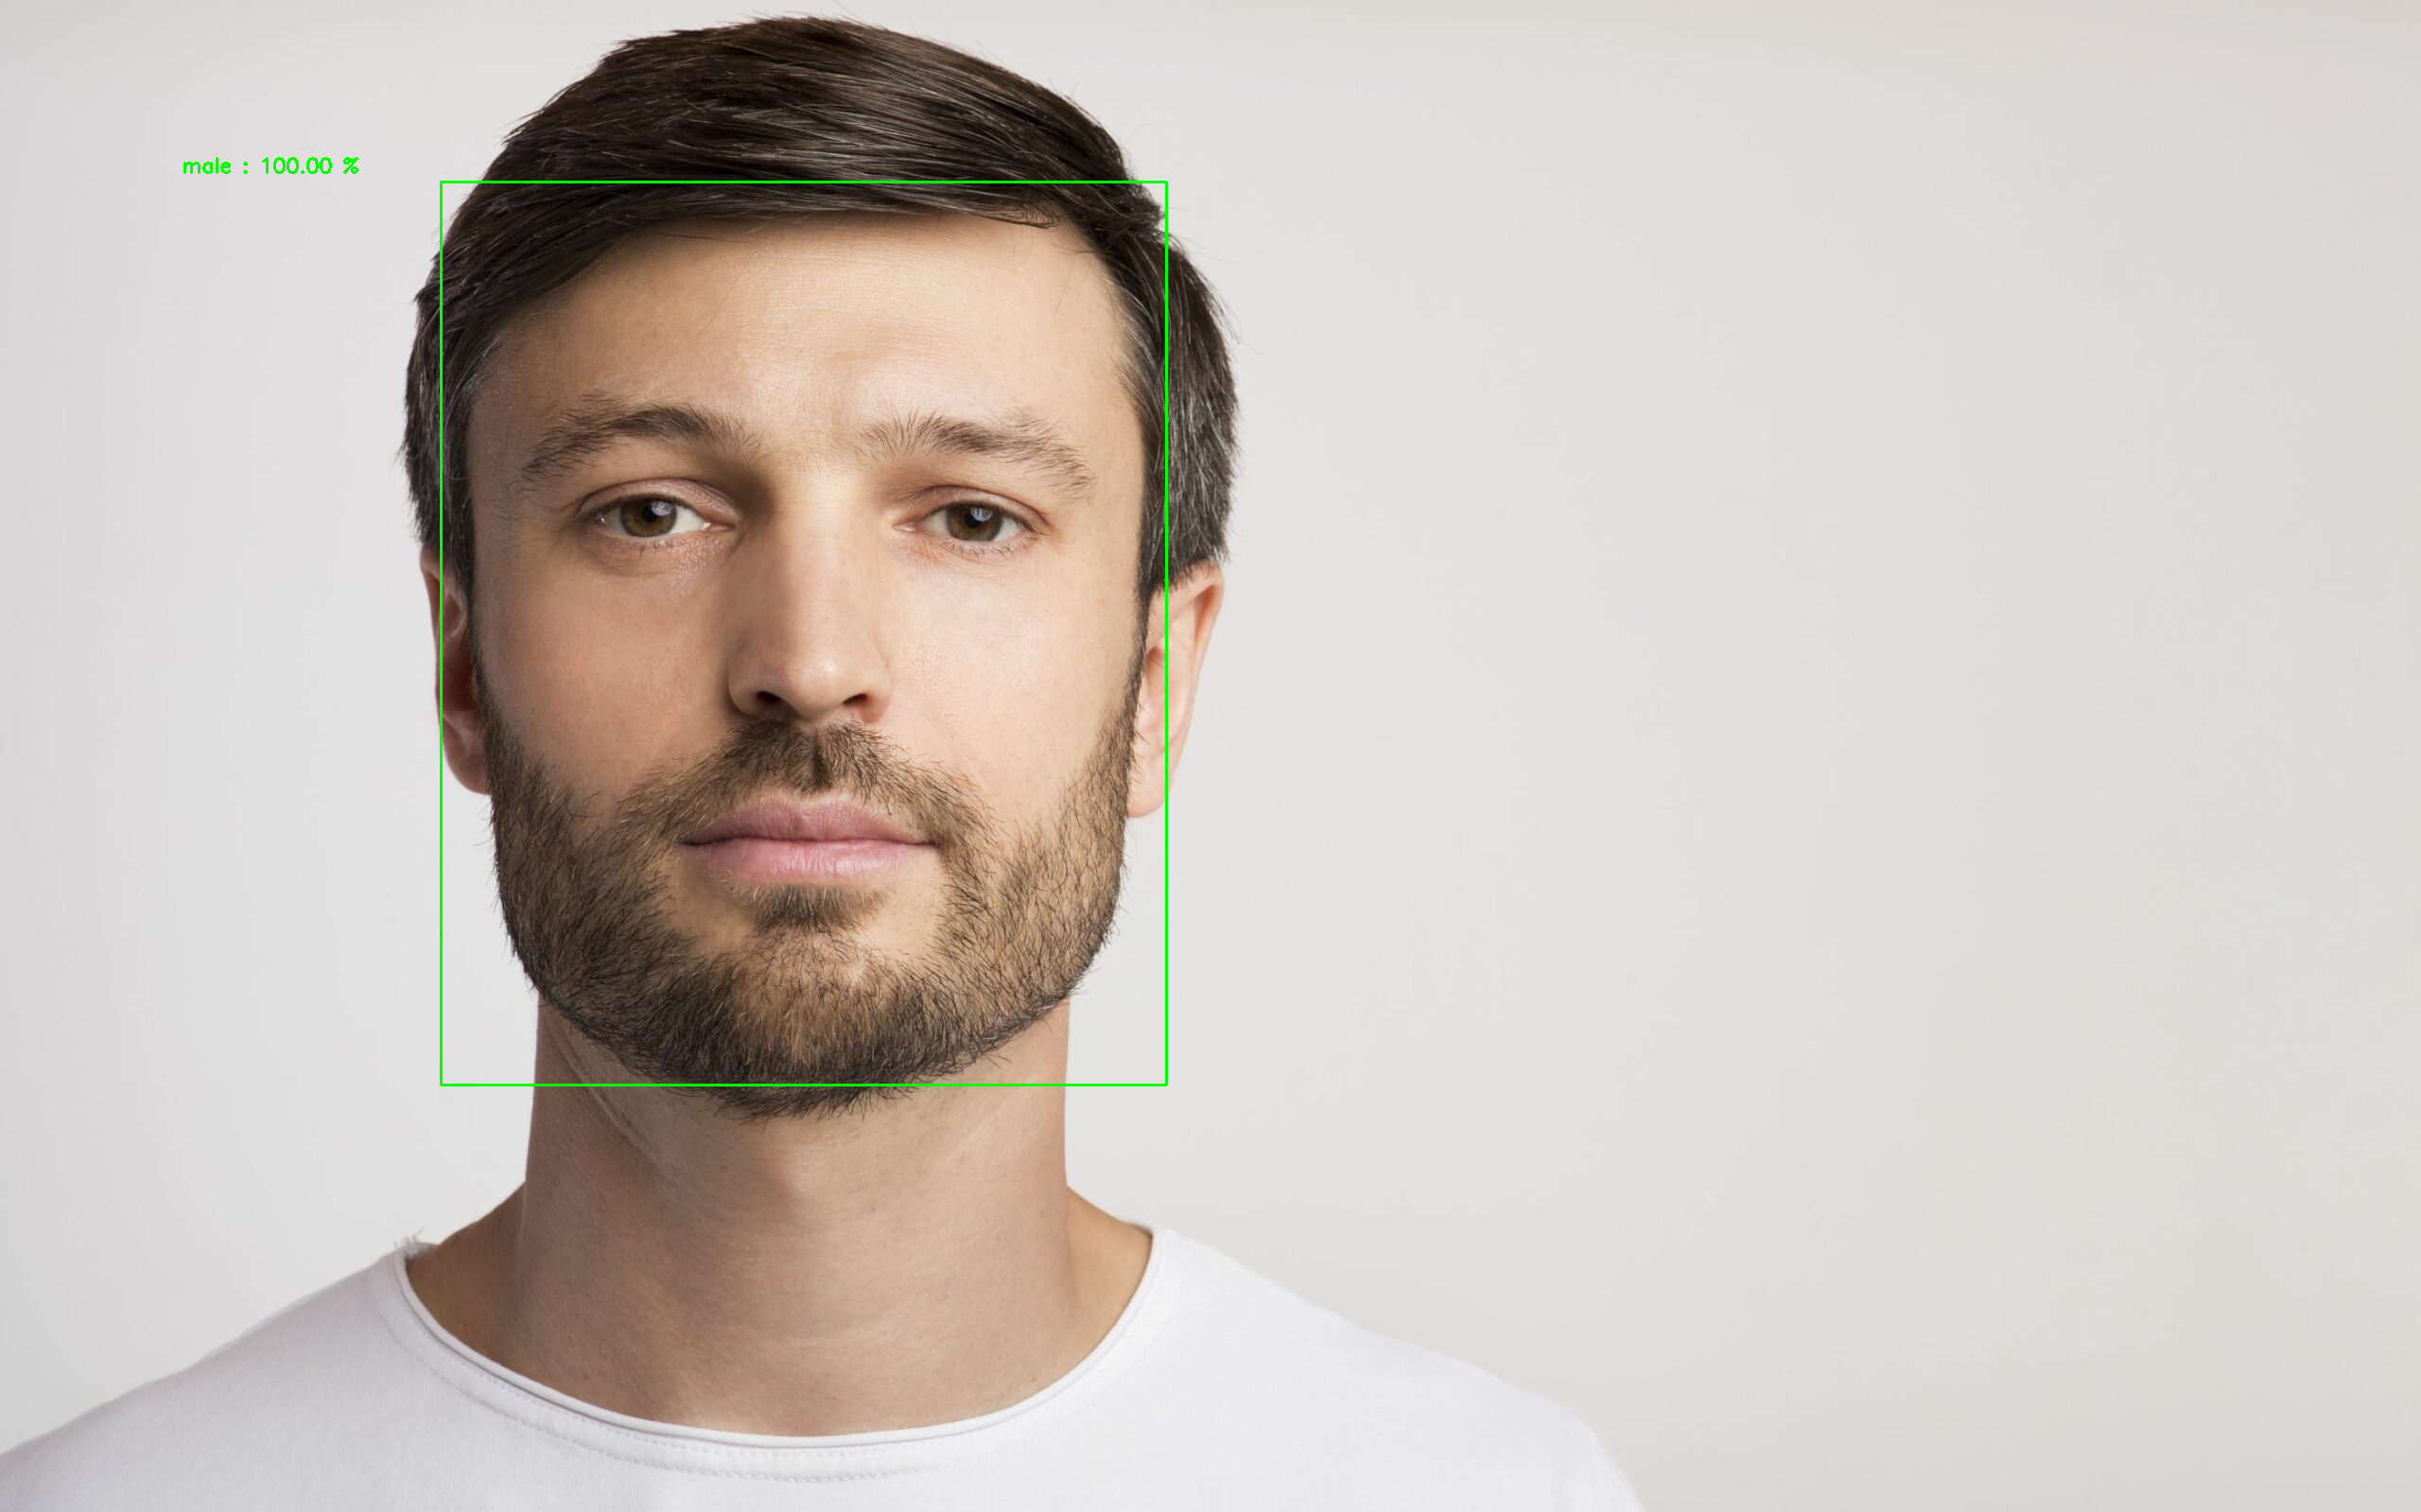

In [45]:
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()